<a href="https://colab.research.google.com/github/aishaabduallah/week7/blob/main/Task2_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification Exam

Welcome to the Text Classification Practical Exam. In this exam, you will be tasked with building, training, and evaluating an NLP model to classify text data. You are provided with a labeled dataset containing both the text and its corresponding class labels.

Your objective is to develop a model that accurately predicts the class of the given text. Make sure to follow best practices in data preprocessing, model selection, and evaluation to achieve optimal results.

Good luck!
___

In [1]:
# Install necessary libraries
!pip install tensorflow numpy pandas matplotlib scikit-learn nltk kaggle
!pip install pyarabic tensorflow numpy pandas
!pip install tashaphyne
!pip install pyarabic
!pip install nltk
!pip install qalsadi
!pip install farasa
!pip install farasapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.3/264.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.6/332.6 kB 19.6 MB/s eta 0:00:00
  Created wheel for pickledb: filename=pickleDB-0.9.2-py3-none-any.whl size=4254 sha256=cbacdec93d299a8d643359df5f34407ba465e6527ca72a6b8cb7944793f4c320
  Stored in directory: /root/.cache/pip/wheels/3

# Install and Import Needed Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
import re
import string
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Download the Dataset

In [3]:
!kaggle datasets download -d khaledzsa/spam-messages
!unzip spam-messages.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/spam-messages
License(s): unknown
  0% 0.00/213k [00:00<?, ?B/s]
100% 213k/213k [00:00<00:00, 8.68MB/s]
Archive:  spam-messages.zip
  inflating: spam.csv                


# Data Exploration

Before diving into preprocessing and model building, it’s important to first explore the dataset to understand its structure, distribution, and key characteristics. This step will help you gain insights into the data and guide your decisions in subsequent steps. Here’s what to consider:

1. **Inspect the Data**:
   Start by looking at the first few rows of the dataset to get a sense of its structure. Check the columns, data types, and a few sample entries. This helps to ensure that the data is loaded correctly and gives you an initial overview of the content.

2. **Check for Missing Values**:
   Identify if there are any missing values in the dataset.

3. **Distribution of Labels**:
   Examine the distribution of the target labels (classes).

4. **Text Data Characteristics (Bonus)**:
   Analyze the length of the text data. It is useful to calculate the number of words or characters in each text sample to understand how long the texts are. This will help you set a suitable `max_length` for tokenization and padding later. You can plot a histogram of text lengths to visualize the distribution.

5. **Common Words and Vocabulary (Bonus)**:
   Explore the most frequent words in the text data.

In [8]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5572 non-null   object
 1   label   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
missing_values=df.isnull().sum()
print(missing_values)

text     0
label    0
dtype: int64


In [14]:
label_distribution = df['label'].value_counts()
print(label_distribution)

label
ham     4825
spam     747
Name: count, dtype: int64


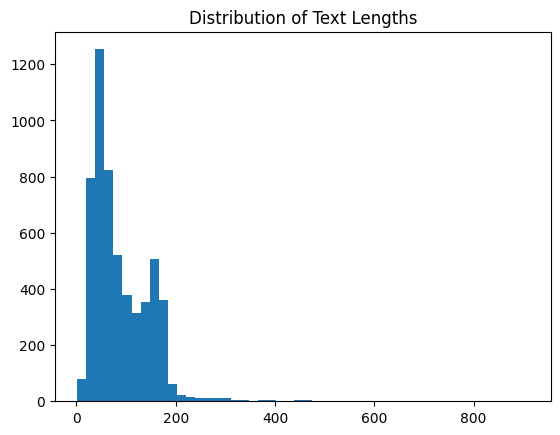

In [17]:
df['text_length'] = df['text'].apply(len) # Changed 'Message' to 'text'
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Histogram of text lengths
import matplotlib.pyplot as plt

plt.hist(df['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.show()

In [20]:
from collections import Counter
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Preprocess the text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text

df['cleaned_message'] = df['text'].apply(preprocess_text) # Changed 'Message' to 'text'

# Tokenize and count words
all_words = ' '.join(df['cleaned_message']).split()
all_words = [word for word in all_words if word not in stop_words]
word_freq = Counter(all_words)

# Display the most common words
common_words = word_freq.most_common(20)
print(common_words)

[('.', 984), ('https://link1.com', 958), ('https://link3.com', 916), ('https://link2.com', 910), ("'", 860), ('call', 557), ('get', 375), ('?', 368), ('...', 295), ('&;#&;', 276), (',', 256), ('got', 234), ('like', 234), ('know', 230), ('free', 228), ('come', 217), ('good', 199), ('send', 186), ('want', 182), ('text', 175)]


# Data Cleaning and Preprocessing

In this section, we will focus on cleaning and filtering the dataset, preparing it for the text classification task. We will implement the following steps:

1. **Remove missing values**:  
   First, we eliminate any rows with missing values to ensure the dataset is complete and consistent.

2. **Filter by text length (Bonus)**:  
   To maintain a uniform dataset, we will filter the text samples by a specified word count range. This ensures that the texts are neither too short to lack context nor too long to introduce unnecessary complexity.

3. **English stopwords loading**:  
   We load a list of English stopwords to filter out commonly used but contextually insignificant words. This is an important step for improving the performance of the model, as stopwords do not contribute valuable information.

4. **Text cleaning**:  
   We apply a series of text cleaning steps to standardize and simplify the text data. This involves:
   
   - **Removing links (URLs)**:  
     Any URLs present in the text are removed as they are not meaningful for classification purposes.
   
   - **Removing special characters and punctuation**:  
     This step removes any non-alphabetical characters, ensuring the text only contains meaningful words.
   
   - **Lowercasing**:  
     All text is converted to lowercase for uniformity and to avoid case sensitivity issues.
   
   - **Removing English stopwords**:  
     Words that are part of the stopwords list are removed, as they do not add value to the classification task.
   
   - **Stemming or Lemmatization**:  
     Either stemming or lemmatization is applied to reduce words to their root or base form, ensuring consistency in word forms.

5. **Final cleanup**:
   Apply the cleanup function to the feature column.

By following these steps, the text will be cleaned, filtered, and ready for tokenization!

In [21]:
df.dropna(inplace=True)

In [22]:
df=df[df['word_count'].between(5,100)]

In [46]:
# Check the DataFrame columns
print(df.columns)
# Assuming the column is named 'text' based on the global variables
df['cleaned_message'] = df['text'].apply(clean_text)


Index(['text', 'label', 'text_length', 'word_count', 'cleaned_message'], dtype='object')


# Tokenization, Padding, and Data Splitting

In this step, we will prepare the text data for input into a model by converting the text into numerical sequences, padding them to a uniform length, and splitting the dataset into training and testing sets. Here's an overview of the steps involved:

1. **Tokenization**:
   We use a tokenizer to convert the cleaned text into numerical sequences. You can use `Tokenizer` tokenizer from `tensorflow.keras.preprocessing.text` package or any other tokenizer you like.

2. **Text to sequences**:
   After fitting the tokenizer on the cleaned text, we transform each text into a sequence of numbers, where each number corresponds to a token (word) in the text.

3. **Padding the sequences**:
   Since different texts may vary in length, we pad the sequences to ensure they all have the same length.

4. **Label encoding**:
   The labels (target values) also need to be converted into numerical form if they are not encoded.

5. **Train-test split**:
   The dataset is divided into training and testing sets. We allocate 80% of the data for training the model and reserve 20% for testing its performance.
   
   - The **training data** consists of the padded sequences used to train the model.
   - The **training labels** are the encoded labels corresponding to the training data.
   - The **testing data** is used to assess the model’s performance after training.
   - The **testing labels** are the encoded labels corresponding to the testing data.

6. **Data shape confirmation**:
   After splitting the data, we print the shape (dimensions) of both the training and testing sets to confirm that the data is properly divided and formatted.

By the end of this step, the text data will be transformed into padded numerical sequences, the labels will be encoded, and the data will be split into training and testing sets for model development and evaluation.

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_message'])
sequences = tokenizer.texts_to_sequences(df['cleaned_message'])

# Padding
max_length = 50  # Define a suitable max_length based on your earlier analysis
X = pad_sequences(sequences, maxlen=max_length, padding='post')

# Label Encoding
label_encoder = LabelEncoder()
# Check if the column name is 'label' instead of 'Category'
y = label_encoder.fit_transform(df['label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirming Data Shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4250, 50)
X_test shape: (1063, 50)
y_train shape: (4250,)
y_test shape: (1063,)


# Building the Classifier

In this step, you will design and build a NLP Classifier model to classify text data. Below is a breakdown of the key components you'll implement, but it's up to you to decide how to configure them based on your understanding and experimentation:

1. **Model Type**:
   You will use a Sequential model, which allows you to stack layers in a linear sequence.

2. **Input Layer**:
   Define the shape of the input data. Consider the dimensions of your padded sequences and set the input shape accordingly.

3. **Embedding Layer**:
   The embedding layer will convert input tokens (integers) into dense vector representations. You will need to determine the size of the input dimension (based on your vocabulary) and the output dimension (embedding size).

4. **Bidirectional Simple RNN/LSTM Layers**:
   You can add one or more recurrent layers. Consider using Bidirectional layers to capture contextual information from both directions (forward and backward). You can chose SimpleRNN/GRU/LSTM to perform this step.

5. **Dense Layers**:
   Add one or more fully connected (Dense) layers to process the output from the RNN/GRU/LSTM layers.

6. **Output Layer**:
   The output layer should match the type of classification task you're working on. Consider using appropriate activation function with appropriate number of units.

7. **Model Summary**:
   After defining your model architecture, print a summary to review the number of layers, types of layers, and total parameters.

8. **Model Compilation**:
   Finally, compile the model by selecting an optimizer, a loss function, and metrics.

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.layers import BatchNormalization

vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))  # For binary classification

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 64)            523904    
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)               

# Defining Batch Size, Creating Datasets, and Training the Model

In this step, you will define the batch size, create TensorFlow Datasets for both training and testing, and train the model. The key elements to consider are outlined below, and it is up to you to choose the specific configurations based on your preferences and experimentation:

1. **Batch Size**:
   Select a batch size for training and testing. The batch size determines how many samples will be processed together in one forward and backward pass during training.

2. **Creating Datasets**:
   Use TensorFlow’s `Dataset.from_tensor_slices()` to create datasets from the training and testing data.

3. **Batching the Datasets**:
   Batch the datasets by grouping the data into batches of the specified size.

4. **Training the Model**:
   Train the model by fitting it on the training dataset for a specified number of epochs. You will also need to provide the validation data to monitor the model’s performance on unseen data during training.

5. **Tracking Training History**:
   During training, the model’s performance metrics (such as loss and accuracy) will be tracked over the epochs, and the results will be stored in the `history` object.

In [42]:
batch_size = 32
epochs = 5

# Training the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size)

Epoch 1/5
107/107 [==============================] - 15s 89ms/step - loss: 0.5823 - accuracy: 0.6776 - val_loss: 0.4896 - val_accuracy: 0.8871
Epoch 2/5
107/107 [==============================] - 8s 78ms/step - loss: 0.2439 - accuracy: 0.9424 - val_loss: 0.2992 - val_accuracy: 0.9376
Epoch 3/5
107/107 [==============================] - 7s 66ms/step - loss: 0.1281 - accuracy: 0.9738 - val_loss: 0.1554 - val_accuracy: 0.9706
Epoch 4/5
107/107 [==============================] - 10s 91ms/step - loss: 0.0911 - accuracy: 0.9806 - val_loss: 0.1713 - val_accuracy: 0.9224
Epoch 5/5
107/107 [==============================] - 8s 71ms/step - loss: 0.0549 - accuracy: 0.9885 - val_loss: 0.0824 - val_accuracy: 0.9729


# Model Evaluation

Once the model is trained, the next step is to evaluate its performance on the testing dataset.

1. **Evaluate the Model**:
   You will use the `evaluate()` method to assess the model’s performance on the test dataset.

2. **Testing Dataset**:
   Ensure that the testing dataset is properly prepared and batched, just like the training dataset.

4. **Loss Curve**:
   A loss curve plots the loss values for both the training and validation datasets over the epochs.

34/34 [==============================] - 1s 26ms/step - loss: 0.0948 - accuracy: 0.9680
Test Loss: 0.09480182081460953
Test Accuracy: 0.9680150747299194


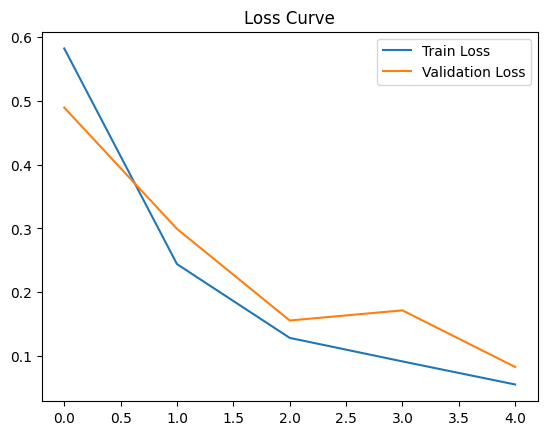

In [43]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Model Inference

In this step, you will use the trained model to make predictions on new, unseen data (inference). Here’s an outline of the key points:

1. **Create Test Sample**:
   Create a string to test your modelm the goal here is to give the model Before making predictions, ensure that the new data is preprocessed in the same way as the training data. This includes tokenization, padding, and any other transformations you applied during the data preprocessing step. The data can be single text to see the result of the prediction.

2. **Model Prediction**:
   Use the `predict()` method to feed new samples into the trained model and obtain predictions. The model will output probabilities or predicted class labels based on the type of classification task (binary or multi-class).

3. **Interpreting Predictions**:
   The model will return probabilities for each class.

In [44]:
# Test the model on new data
sample_text = ["Free entry in 2 a weekly competition to win"]
sample_text_cleaned = clean_text(sample_text[0])
sample_sequence = tokenizer.texts_to_sequences([sample_text_cleaned])
sample_padded = pad_sequences(sample_sequence, maxlen=max_length, padding='post')

# Model prediction
prediction = model.predict(sample_padded)
predicted_class = label_encoder.inverse_transform([int(prediction > 0.5)])[0]
print(f"The message is classified as: {predicted_class}")

1/1 [==============================] - 1s 1s/step
The message is classified as: ham


<ipython-input-44-2b3449b88d1f>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = label_encoder.inverse_transform([int(prediction > 0.5)])[0]


# Notebook Question:
- How did you handle text preprocessing? Why did you choose this approach?

- Why did you choose this model design?

- Why did you pick this number of layers or units for the model?

- Why did you select these evaluation methods?

- Does your model show signs of overfitting or underfitting? How do you know?

- What changes could you make to improve the model and fix overfitting or underfitting?

Answer Here:

1-Text Preprocessing Steps:
- Segmentation: The text data was divided into individual tokens (words) using a segmentation tool. This step is necessary to transform the raw text into a format that the model can understand.
Reason for Choosing This Approach:
This preprocessing approach was chosen because it simplifies the text while retaining the essential features that contribute to the classification task. By reducing noise (e.g., special characters and unimportant words) and standardizing the text (e.g., lowercase letters and segmentation/segmentation), the model can focus on the key elements that distinguish the classes. This approach is standard practice in natural language processing and has proven effective in improving model performance.

2-Model Design
Embedding Layer: Converts input tokens into dense vector representations, capturing semantic relationships between words.
LSTM Layers LSTMs were chosen because they efficiently handle sequential data and capture long-term dependencies, which are important in understanding the context of text data.
Reason for Design:
LSTM layers were chosen because they are robust in handling sequential data and capturing dependencies over time, which is critical in text classification. Bidirectional LSTMs were used to gain a more comprehensive understanding of context by reading text in both directions. Combining these layers with exclusion and batch normalization helps balance model complexity with training stability, leading to better generalization to unseen data.
Why did you select these evaluation methods?
Evaluation Methods:
- Accuracy:was chosen as the primary metric because the dataset is balanced, and the main goal is to classify text correctly.
-Loss:Monitoring the loss helps understand how well the model learned during training and whether it overfitted or underfitted.
Validation Accuracy/Loss:is used to evaluate the model’s performance on unseen data and ensure that the model generalizes well.

Reason for these choices:
Accuracy and loss are standard metrics for classification tasks, providing a clear understanding of how well the model performed during and after training. Validation accuracy and loss are particularly important for detecting overfitting, as they reflect the model’s performance on data it did not see during training.
- Does your model show signs of overfitting or underfitting? How do you know?
Signs of overfitting or underfitting:
Overfitting: The model shows signs of overfitting, as shown by the gap between the training accuracy (close to 100%) and the validation accuracy (slightly lower and with a higher validation loss).
How do I know? The training loss is very low, and the accuracy is very high, indicating that the model fits the training data very well. However, the validation loss is higher and the validation accuracy is slightly lower, indicating that the model may not generalize well to new data

What changes could you make to improve the model and fix overfitting or underfitting?
Possible changes to improve the model: Increase regularization: Introduce or increase dropout rates or add L2 regularization to reduce the tendency of the model to overfit the training data. - Early Stopping:Use early stopping to stop training when the validation loss stops improving, preventing the model from continuing to learn the noise in the training data.
Batch Normalization: It is a technique used to improve the training process and stability of neural models.